In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Data/Real-Data/Real_Combine.csv')

In [3]:
df.head()


,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,12.8,22.6,4.0,1020.0,75.0,1.3,2.0,9.4,60.436250
1,13.8,23.0,6.5,1020.7,79.0,1.1,0.9,3.5,47.497083
2,13.5,23.4,6.7,1021.3,83.0,0.6,7.2,22.2,48.394583
3,13.2,20.0,7.1,1019.9,88.0,0.8,3.7,9.4,57.945417
4,13.6,20.1,7.0,1017.5,85.0,0.8,6.9,14.8,60.902500


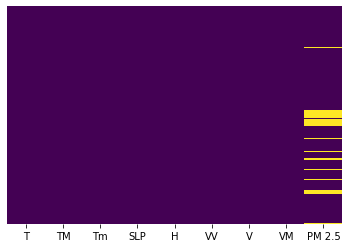

In [4]:
## Check for null values

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [5]:
df=df.dropna()

In [6]:
X=df.iloc[:,:-1] ## independent features
y=df.iloc[:,-1] ## dependent features

In [7]:
## check null values
X.isnull()

,T,TM,Tm,SLP,H,VV,V,VM
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
888,False,False,False,False,False,False,False,False
889,False,False,False,False,False,False,False,False
890,False,False,False,False,False,False,False,False
891,False,False,False,False,False,False,False,False


In [8]:
y.isnull()


0      False
1      False
2      False
3      False
4      False
       ...  
888    False
889    False
890    False
891    False
892    False
Name: PM 2.5, Length: 801, dtype: bool

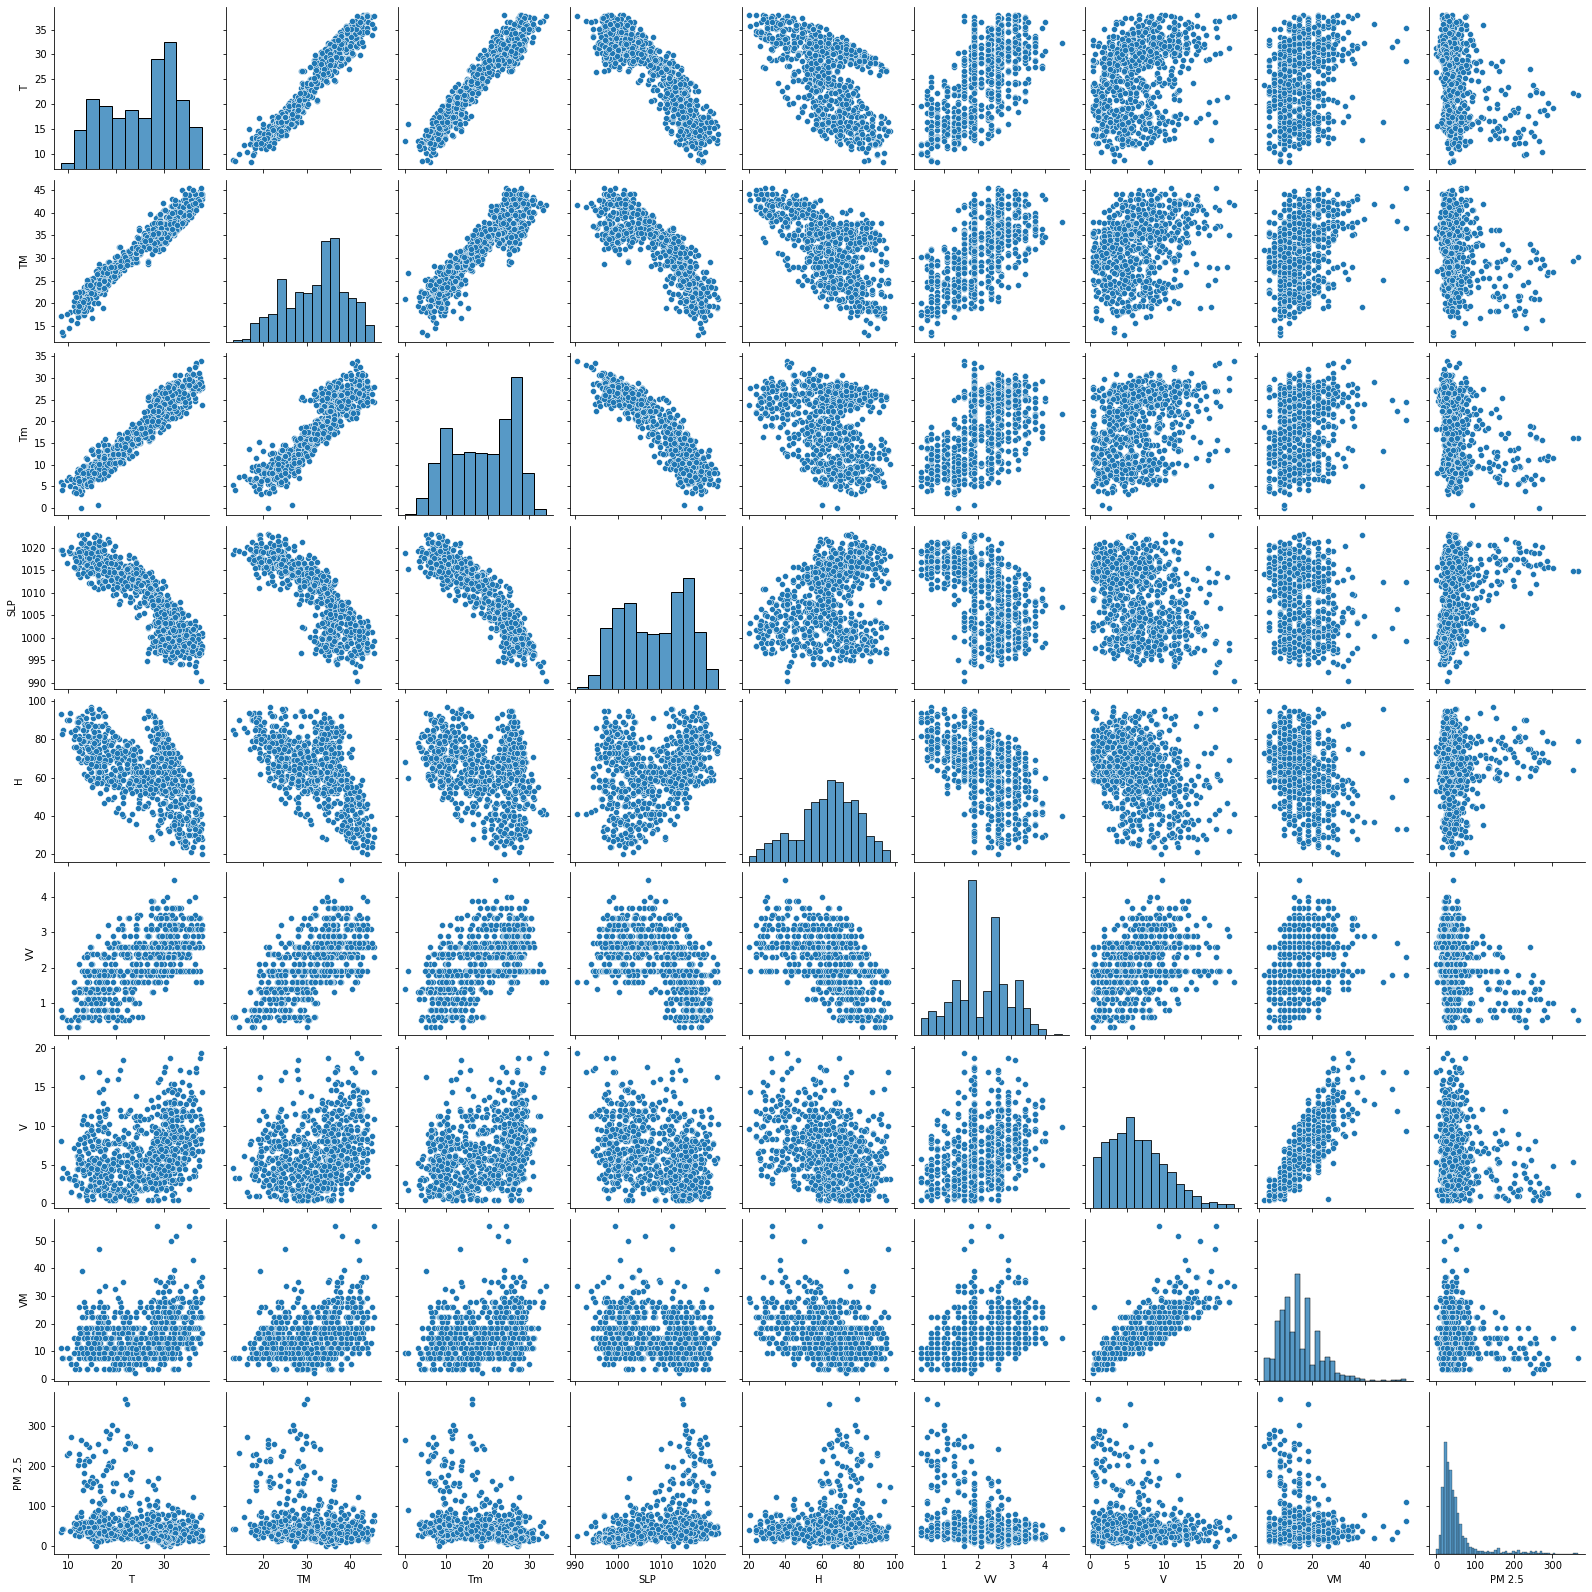

In [9]:
sns.pairplot(df)
plt.show()

In [10]:
df.corr()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
T,1.000000,0.965654,0.952481,-0.884520,-0.542981,0.648102,0.306993,0.275843,-0.347176
TM,0.965654,1.000000,0.892373,-0.834988,-0.606840,0.617572,0.283873,0.286975,-0.321148
Tm,0.952481,0.892373,1.000000,-0.914488,-0.321380,0.550158,0.302561,0.241312,-0.351656
SLP,-0.884520,-0.834988,-0.914488,1.000000,0.291176,-0.514929,-0.309846,-0.260956,0.379463
H,-0.542981,-0.606840,-0.321380,0.291176,1.000000,-0.552225,-0.336072,-0.365865,0.108396
VV,0.648102,0.617572,0.550158,-0.514929,-0.552225,1.000000,0.379118,0.333477,-0.355831
V,0.306993,0.283873,0.302561,-0.309846,-0.336072,0.379118,1.000000,0.826139,-0.194147
VM,0.275843,0.286975,0.241312,-0.260956,-0.365865,0.333477,0.826139,1.000000,-0.158485
PM 2.5,-0.347176,-0.321148,-0.351656,0.379463,0.108396,-0.355831,-0.194147,-0.158485,1.000000


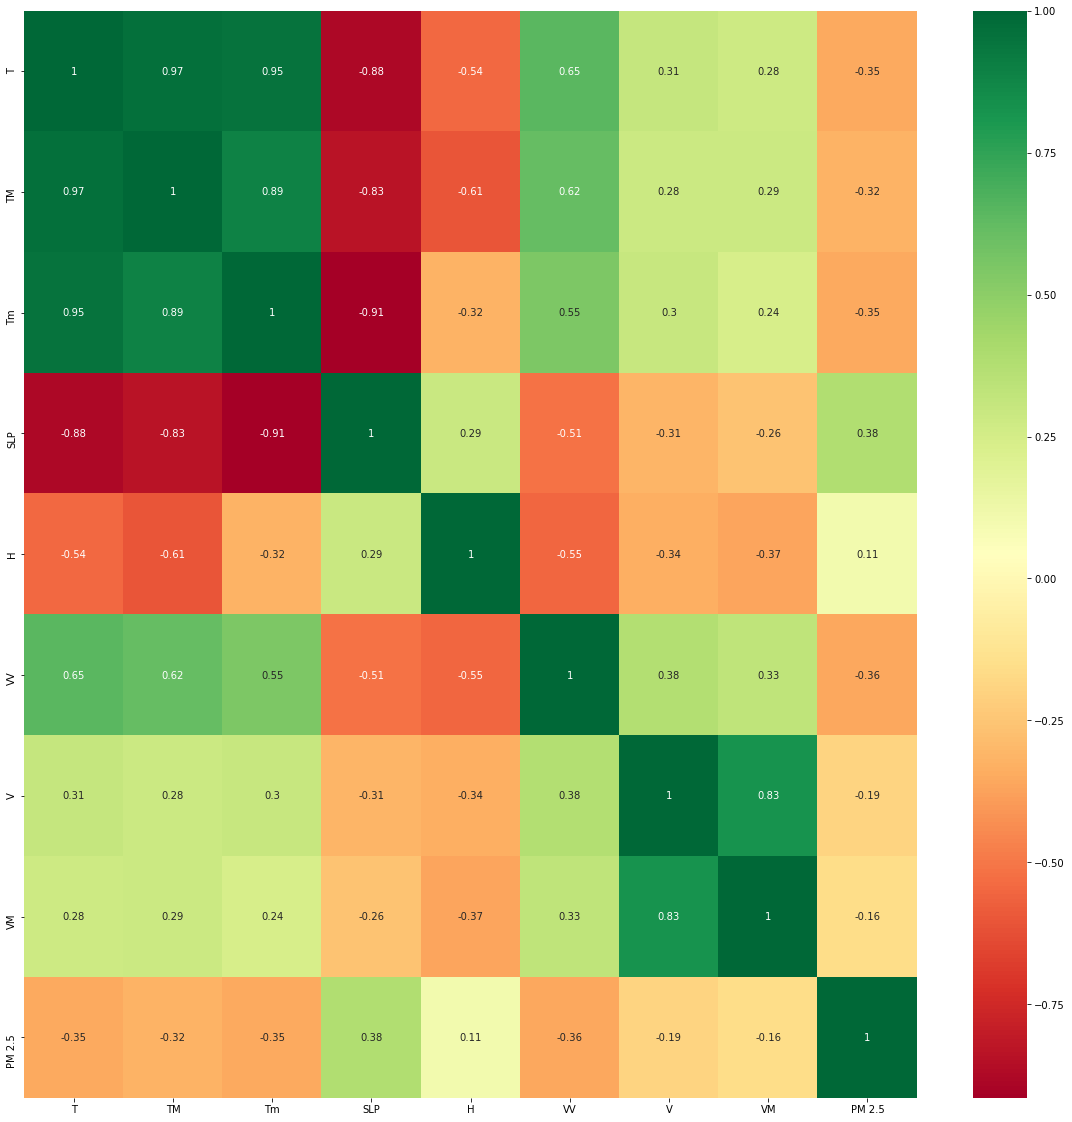

In [11]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.show()

In [12]:
corrmat.index

Index(['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5'], dtype='object')

In [13]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [14]:
X.head()

,T,TM,Tm,SLP,H,VV,V,VM
0,12.8,22.6,4.0,1020.0,75.0,1.3,2.0,9.4
1,13.8,23.0,6.5,1020.7,79.0,1.1,0.9,3.5
2,13.5,23.4,6.7,1021.3,83.0,0.6,7.2,22.2
3,13.2,20.0,7.1,1019.9,88.0,0.8,3.7,9.4
4,13.6,20.1,7.0,1017.5,85.0,0.8,6.9,14.8


In [15]:
print(model.feature_importances_)

[0.12385666 0.11770517 0.12865903 0.12994554 0.15393963 0.16689347
 0.09039683 0.08860366]


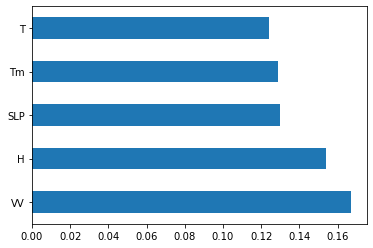

In [16]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()


### Comparison linear ridge and lasso

C:\Users\adars\anaconda3\envs\sk\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


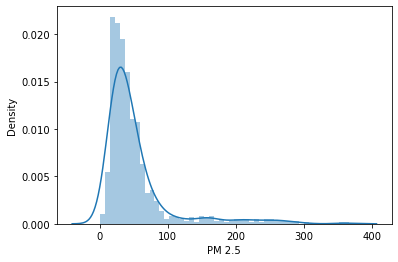

In [17]:
sns.distplot(y)
plt.show()


### Train Test split

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Linear Regression

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [20]:
lin_regressor=LinearRegression()
mse=cross_val_score(lin_regressor,X,y,scoring='neg_mean_squared_error',cv=5)
mean_mse=np.mean(mse)
print(mean_mse)

-2508.906116158107


## Ridge Regression

In [21]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [22]:
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [23]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 1e-15}
-2508.906116158109



 ## Lasso Regression

In [24]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [25]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

C:\Users\adars\anaconda3\envs\sk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 771258.9958870222, tolerance: 198.77589390713717
  model = cd_fast.enet_coordinate_descent(
C:\Users\adars\anaconda3\envs\sk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 448338.4413085999, tolerance: 148.24555582568837
  model = cd_fast.enet_coordinate_descent(
C:\Users\adars\anaconda3\envs\sk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 338743.8246908905, tolerance: 85.2024221885799
  model = cd_fast.enet_coordinate_descent(
C:\Users\adars\anaconda3\envs\sk\lib\site-packages\sklearn\linear_model\_coordinate_

{'alpha': 1}
-2507.655649791276


#### Model evaluation

In [26]:
prediction=lasso_regressor.predict(X_test)

C:\Users\adars\anaconda3\envs\sk\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


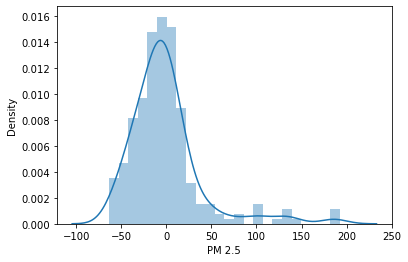

In [27]:
sns.distplot(y_test-prediction)
plt.show()

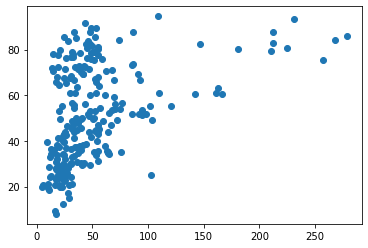

In [28]:
plt.scatter(y_test,prediction)
plt.show()

In [29]:
from sklearn import metrics

In [30]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 26.418264795691826
MSE: 1654.1047136530092
RMSE: 40.670686171406174


In [31]:
import pickle

In [32]:
# open a file, where you ant to store the data
file = open('lasso_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(lasso_regressor, file)